### LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from utilities.utils import load_sns_theme

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# KRR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# RIDGE
from sklearn.linear_model import Ridge


### DATASET

In [3]:
df = pd.read_csv(r"data\molec_structure.csv")
df

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.00,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.00,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.00,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.00,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.00,Ba0.3La1.7Cu1O4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2.44,Tm0.84Lu0.16Fe3Si5
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,122.10,Tl1Ba2Ca3Cu4O11
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.98,Nb0.8Pd0.2
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1.84,Nb0.69Pd0.31


Isolate Y

In [3]:
y = pd.DataFrame(df["critical_temp"])
y

,critical_temp
0,29.00
1,26.00
2,19.00
3,22.00
4,23.00
...,...
21258,2.44
21259,122.10
21260,1.98
21261,1.84


Drop

In [4]:
df = df.drop(columns=["material", "critical_temp"])
df

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21259,0.0,0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0
21260,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
21261,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


### SEABORN THEME

In [5]:
load_sns_theme(r"utilities\themes\fire_theme.json")

{'figure.facecolor': '#202021',
 'axes.facecolor': '#262626',
 'axes.edgecolor': '#cfcfd1',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#ffffff',
 'ytick.color': '#ffffff',
 'axes.labelcolor': '#ffffff'}

## MODELS

### PCA - PRINCIPAL COMPONENTS ANALYSIS

Standardize features

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Model definition and fit

In [7]:
pca = PCA(n_components=5)

In [8]:
X_pca = pca.fit_transform(df_scaled)

All dimensions plot

<Axes: >

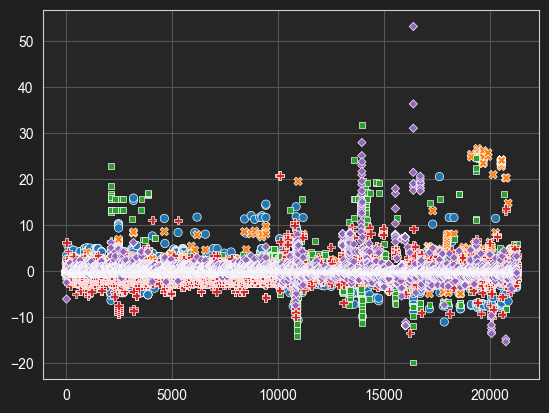

In [9]:
sns.scatterplot(
    data=X_pca, legend=False
)

First 3 dimensions plot

In [10]:
def get_features_name_from_dim(feature_names: list, pca_model, dimension: int):

    coefficients_dict = {feature_names[i]: pca_model.components_[dimension][i] for i in range(len(feature_names))}
    coefficients_dict = dict(sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True))

    print(f"\nCoefficients for Dimension {dimension}:")
    print(coefficients_dict)

    return coefficients_dict

In [11]:
feature_names = df.columns

coeff_0 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=0)

coeff_1 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=1)

coeff_2 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=2)


Coefficients for Dimension 0:
{'O': 0.4838582630164529, 'Cu': 0.4431535991819534, 'Ba': 0.33805636086190205, 'Sr': 0.2464987697530163, 'Y': 0.2218133522094966, 'Fe': -0.20765429026734586, 'As': -0.18489416395649558, 'Pt': -0.15072043735869112, 'Bi': 0.1490279161632398, 'C': -0.12438776074670058, 'Ca': 0.11852200315027124, 'B': -0.10041005027684795, 'Nb': -0.09759124042691447, 'K': -0.09566699919479113, 'Tl': 0.09279903516956045, 'Ir': -0.09241713647145486, 'Na': -0.09155478726314248, 'Ga': -0.08625252042130432, 'Hg': 0.08370188086898239, 'Mg': -0.08327321635601945, 'Rb': -0.08218060024417546, 'Gd': 0.07992732053161121, 'Se': -0.07949395186494104, 'V': -0.07658403516035521, 'S': -0.06927077608762847, 'Mo': -0.06903864874454212, 'Sb': -0.06845986149825728, 'Zr': -0.06790877906871061, 'N': -0.06642715588634454, 'Ta': -0.06587643705630726, 'H': -0.06522279007570751, 'Ni': -0.06509046149395047, 'In': -0.06505335974412642, 'Pd': -0.06390170459249643, 'Rh': -0.061317114681949794, 'Li': -0.06

C:\Users\feder\AppData\Local\Temp\ipykernel_12144\1302463724.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)


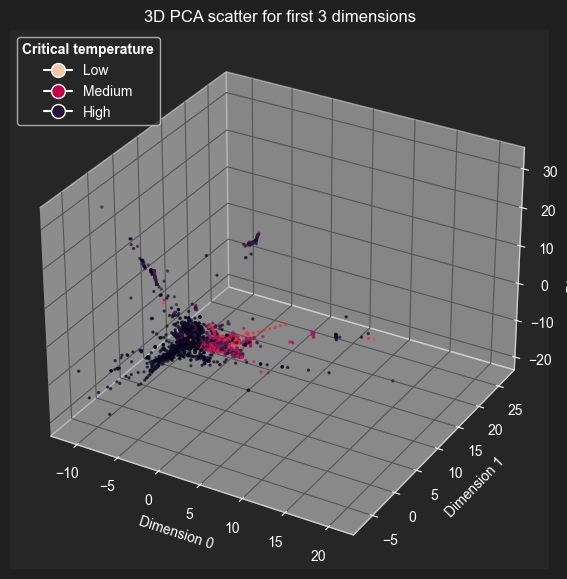

In [13]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:, 0], ys=X_pca[:, 1], zs=X_pca[:, 2],
           c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)

ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 1')
ax.set_zlabel('Dimension 2')
ax.set_title('3D PCA scatter for first 3 dimensions', color="white")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#f5c5ac', markersize=10, label='Low'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#c6004e', markersize=10, label='Medium'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#251432', markersize=10, label='High')
]

legend = ax.legend(handles=legend_elements, title="Critical temperature", loc='upper left', labels=['Low', 'Medium', 'High'])
for text in legend.get_texts():
    text.set_color('white')
legend.get_title().set_color('white')
legend.get_title().set_weight('bold')


Dimensions from 2 to 4 plot

In [14]:
feature_names = df.columns

coeff_3 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=2)

coeff_4 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=3)

coeff_5 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=4)


Coefficients for Dimension 2:
{'C': 0.5342769203650911, 'Rb': 0.33830813412520977, 'Na': 0.3339648295115436, 'K': 0.2745225712599045, 'H': 0.2528760309696619, 'Cs': 0.24874603798225967, 'Ga': -0.18755103354868097, 'Nb': -0.17972623819446062, 'V': -0.14946705185791068, 'Ir': -0.13030082796040654, 'N': 0.126268306585514, 'Mn': -0.11953533776751249, 'Zr': -0.1182768359115529, 'Ta': -0.11190169105850563, 'Ge': -0.09625213997870197, 'Ti': -0.09280446106909926, 'Bi': 0.09067528688704574, 'Rh': -0.08661077394996274, 'Sr': 0.08352452918956563, 'Mg': -0.07742651036495073, 'Si': -0.07721907075414332, 'Pt': -0.07715943480750623, 'Ni': -0.07447005009045594, 'B': -0.0731429646654276, 'Cl': 0.0648274202271078, 'Lu': -0.06403926847482547, 'Sb': -0.06302032844756841, 'Pd': -0.061062735519139946, 'Ba': -0.05816619426998512, 'Ru': -0.0521465580337958, 'As': -0.05145426378352687, 'Co': -0.04729945853524022, 'Al': -0.04623881301708701, 'Au': -0.04580662123554579, 'Sc': -0.044790914753332155, 'Y': -0.0440

C:\Users\feder\AppData\Local\Temp\ipykernel_12144\4166558176.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)


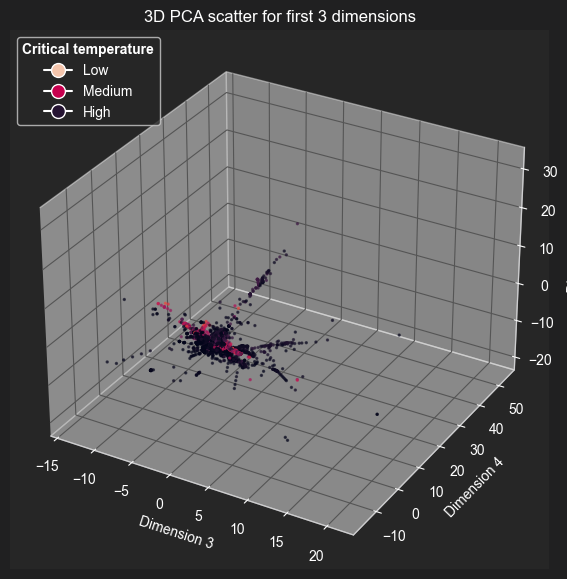

In [15]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:, 3], ys=X_pca[:, 4], zs=X_pca[:, 2],
           c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)

ax.set_xlabel('Dimension 3')
ax.set_ylabel('Dimension 4')
ax.set_zlabel('Dimension 2')
ax.set_title('3D PCA scatter for first 3 dimensions', color="white")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#f5c5ac', markersize=10, label='Low'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#c6004e', markersize=10, label='Medium'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#251432', markersize=10, label='High')
]

legend = ax.legend(handles=legend_elements, title="Critical temperature", loc='upper left', labels=['Low', 'Medium', 'High'])
for text in legend.get_texts():
    text.set_color('white')
legend.get_title().set_color('white')
legend.get_title().set_weight('bold')


Dimensions 0 + 3 + 4

In [16]:
feature_names = df.columns

coeff_3 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=0)

coeff_4 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=3)

coeff_5 = get_features_name_from_dim(feature_names=feature_names, pca_model=pca, dimension=4)


Coefficients for Dimension 0:
{'O': 0.4838582630164529, 'Cu': 0.4431535991819534, 'Ba': 0.33805636086190205, 'Sr': 0.2464987697530163, 'Y': 0.2218133522094966, 'Fe': -0.20765429026734586, 'As': -0.18489416395649558, 'Pt': -0.15072043735869112, 'Bi': 0.1490279161632398, 'C': -0.12438776074670058, 'Ca': 0.11852200315027124, 'B': -0.10041005027684795, 'Nb': -0.09759124042691447, 'K': -0.09566699919479113, 'Tl': 0.09279903516956045, 'Ir': -0.09241713647145486, 'Na': -0.09155478726314248, 'Ga': -0.08625252042130432, 'Hg': 0.08370188086898239, 'Mg': -0.08327321635601945, 'Rb': -0.08218060024417546, 'Gd': 0.07992732053161121, 'Se': -0.07949395186494104, 'V': -0.07658403516035521, 'S': -0.06927077608762847, 'Mo': -0.06903864874454212, 'Sb': -0.06845986149825728, 'Zr': -0.06790877906871061, 'N': -0.06642715588634454, 'Ta': -0.06587643705630726, 'H': -0.06522279007570751, 'Ni': -0.06509046149395047, 'In': -0.06505335974412642, 'Pd': -0.06390170459249643, 'Rh': -0.061317114681949794, 'Li': -0.06

C:\Users\feder\AppData\Local\Temp\ipykernel_12144\2027381816.py:4: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)


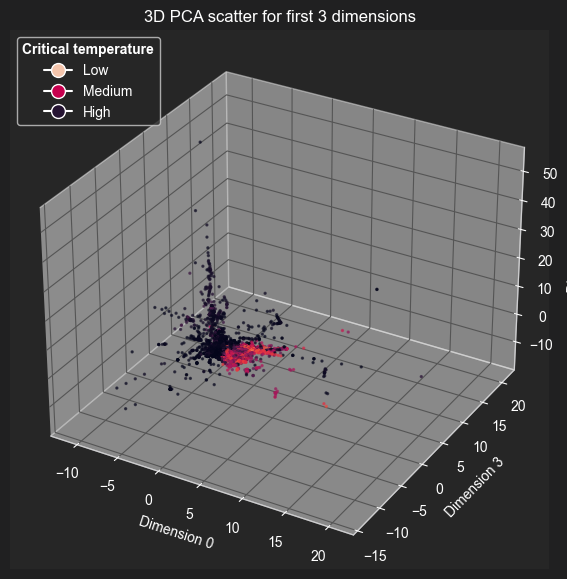

In [17]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=X_pca[:, 0], ys=X_pca[:, 3], zs=X_pca[:, 4],
           c=y["critical_temp"].ravel(), cmap="rocket", s=2, alpha=0.6)

ax.set_xlabel('Dimension 0')
ax.set_ylabel('Dimension 3')
ax.set_zlabel('Dimension 4')
ax.set_title('3D PCA scatter for first 3 dimensions', color="white")

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#f5c5ac', markersize=10, label='Low'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#c6004e', markersize=10, label='Medium'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='#251432', markersize=10, label='High')
]

legend = ax.legend(handles=legend_elements, title="Critical temperature", loc='upper left', labels=['Low', 'Medium', 'High'])
for text in legend.get_texts():
    text.set_color('white')
legend.get_title().set_color('white')
legend.get_title().set_weight('bold')


### KRR - KERNEL RIDGE REGRESSION

In [20]:
df = pd.read_csv("data\molec_structure.csv")
df = df.drop(columns=["material"])

Split dataset

In [21]:
y = df[["critical_temp"]]
X = df.drop(columns=["critical_temp"])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Definition and fit

In [24]:
krr = KernelRidge(alpha=0.1, kernel='rbf')

In [25]:
krr.fit(X_train, y_train)

KernelRidge(alpha=0.1, kernel='rbf')

Prediction

In [26]:
y_pred = krr.predict(X_test)

In [27]:
rmse = mean_squared_error(y_test, y_pred)
rmse

241.7438105407379

In [28]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7899853049231881

Coefficients

In [29]:
coefficients = krr.dual_coef_
coefficients

array([[  7.88112944],
       [183.36772868],
       [ 15.22388689],
       ...,
       [-99.60151993],
       [-28.22462765],
       [-50.79614767]])

### RIDGE REGRESSION

Split dataset

In [62]:
y = df[["critical_temp"]]
X = df.drop(columns=["critical_temp"])

Standardize features

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Definition and fit

In [65]:
ridge = Ridge(alpha=0.1)

In [66]:
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

Prediction

In [67]:
y_pred = ridge.predict(X_test)

In [68]:
rmse = mean_squared_error(y_test, y_pred)
rmse

397.4702075027879

In [69]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.654698152378349

Coefficients

In [79]:
coefficients = {feature: coeff for feature, coeff in zip(X, ridge.coef_[0])}
coefficients

{'H': -0.10559767729776336,
 'He': 0.0,
 'Li': -0.0776842198820747,
 'Be': -0.2990477576700096,
 'B': -0.8730064484472408,
 'C': -0.6834418064292984,
 'N': -0.12496489863598213,
 'O': 0.5000045754573923,
 'F': 0.7949232719598432,
 'Ne': 0.0,
 'Na': 0.21984938995552072,
 'Mg': 1.3755803085103877,
 'Al': -1.2654017787404361,
 'Si': -7.33231729528282,
 'P': -0.24314927373553227,
 'S': -1.4746756307063111,
 'Cl': -0.1000466317399991,
 'Ar': 0.0,
 'K': 0.07895957753672758,
 'Ca': 7.4504515107918845,
 'Sc': 0.5269614364105508,
 'Ti': -0.4646625391872641,
 'V': 0.9510014744692393,
 'Cr': -0.052827236101301474,
 'Mn': -0.10778269664444326,
 'Fe': 0.6274538450316186,
 'Co': -0.618239490378667,
 'Ni': -0.7363751983901337,
 'Cu': 1.976379234265132,
 'Zn': -0.30609136986431623,
 'Ga': -1.107756149071763,
 'Ge': -2.8579109911714107,
 'As': -4.0407958727610085,
 'Se': -0.7939139156532394,
 'Br': -0.2653273984730086,
 'Kr': 0.0,
 'Rb': 0.6638939079814565,
 'Sr': 8.800667651389345,
 'Y': 2.12035806094

In [82]:
sort_coeff = dict(sorted(coefficients.items(), key=lambda x: abs(x[1]), reverse=True))
sort_coeff

{'Ba': 19.79278708721856,
 'Sr': 8.800667651389345,
 'Ca': 7.4504515107918845,
 'Si': -7.33231729528282,
 'As': -4.0407958727610085,
 'Ge': -2.8579109911714107,
 'Hg': 2.8533222263893143,
 'Bi': 2.3589800726910664,
 'Y': 2.120358060946219,
 'Tl': 2.0678300287557327,
 'Cu': 1.976379234265132,
 'S': -1.4746756307063111,
 'Mg': 1.3755803085103877,
 'Al': -1.2654017787404361,
 'Yb': 1.2647281151123944,
 'Nb': 1.2502558147051073,
 'Ce': -1.2373941816223726,
 'Lu': 1.2356075426497748,
 'Ir': -1.1365798237934248,
 'Ga': -1.107756149071763,
 'Sn': -0.970129722418645,
 'V': 0.9510014744692393,
 'B': -0.8730064484472408,
 'F': 0.7949232719598432,
 'Se': -0.7939139156532394,
 'Ni': -0.7363751983901337,
 'Os': -0.7261188275485736,
 'C': -0.6834418064292984,
 'Dy': 0.6785967842987942,
 'Rh': -0.671715527667235,
 'Er': 0.6663152873278079,
 'Rb': 0.6638939079814565,
 'Fe': 0.6274538450316186,
 'Ho': 0.6253668698946088,
 'Co': -0.618239490378667,
 'Sm': 0.6090460234620609,
 'Ag': -0.5723193423742351,
